# Agent4Edu 数据分析

本notebook用于读取和展示Agent4Edu项目中的教育数据集。

## 数据集概述
该数据集包含学生练习行为、问题、知识组件、专业方向等多维度的教育数据。

### 数据表字段总览

| 表名 (文件名) | 字段 (Columns) & 含义 |
|---|---|
| `Questions.csv` | <ul><li>`id`: 问题唯一标识符</li><li>`question_rich_text`: 问题的富文本内容（包含HTML和LaTeX）</li><li>`question_title`: 问题标题</li><li>`explanation`: 问题解释</li><li>`hint_text`: 提示文本</li><li>`question_text`: 问题纯文本内容</li><li>`difficulty`: 问题难度等级（0-4）</li></ul> |
| `Question_Choices.csv` | <ul><li>`id`: 选项唯一标识符</li><li>`choice_text`: 选项文本内容</li><li>`is_correct`: 是否为正确答案</li><li>`question_id`: 关联的问题ID（外键）</li></ul> |
| `KCs.csv` | <ul><li>`id`: 知识组件唯一标识符</li><li>`name`: 知识组件名称</li><li>`description`: 知识组件详细描述</li></ul> |
| `KC_Relationships.csv` | <ul><li>`id`: 关系唯一标识符</li><li>`from_knowledgecomponent_id`: 源知识组件ID（外键）</li><li>`to_knowledgecomponent_id`: 目标知识组件ID（外键）</li></ul> |
| `Question_KC_Relationships.csv` | <ul><li>`id`: 关系唯一标识符</li><li>`question_id`: 问题ID（外键）</li><li>`knowledgecomponent_id`: 知识组件ID（外键）</li></ul> |
| `Transaction.csv` | <ul><li>`id`: 交易记录唯一标识符</li><li>`selection_change`: 选择变更次数</li><li>`start_time`: 开始答题时间</li><li>`end_time`: 结束答题时间</li><li>`difficulty_feedback`: 学生感知难度反馈（0-3）</li><li>`trust_feedback`: 学生答题信心度（0-3）</li><li>`answer_state`: 答题结果（true=正确，false=错误）</li><li>`answer_text`: 学生答案文本</li><li>`student_id`: 学生ID</li><li>`hint_used`: 是否使用了提示</li><li>`question_id`: 问题ID（外键）</li><li>`answer_choice_id`: 选择的答案选项ID（外键）</li><li>`is_hidden`: 是否隐藏记录</li></ul> |
| `Specialization.csv` | <ul><li>`id`: 专业方向唯一标识符</li><li>`title`: 专业方向名称</li></ul> |
| `Student_Specialization.csv` | <ul><li>`id`: 关系唯一标识符</li><li>`specialization_id`: 专业方向ID（外键，可为空）</li><li>`student_id`: 学生ID</li></ul> |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)


## 1. 数据加载


In [2]:
# 数据文件路径
data_path = "../data/"

# 加载所有CSV文件
print("正在加载数据文件...")

# 1. 问题数据
questions_df = pd.read_csv(data_path + "Questions.csv")
print(f"Questions.csv: {questions_df.shape[0]} 行, {questions_df.shape[1]} 列")

# 2. 问题选项数据
question_choices_df = pd.read_csv(data_path + "Question_Choices.csv")
print(f"Question_Choices.csv: {question_choices_df.shape[0]} 行, {question_choices_df.shape[1]} 列")

# 3. 知识组件数据
kcs_df = pd.read_csv(data_path + "KCs.csv")
print(f"KCs.csv: {kcs_df.shape[0]} 行, {kcs_df.shape[1]} 列")

# 4. 知识组件关系数据
kc_relationships_df = pd.read_csv(data_path + "KC_Relationships.csv")
print(f"KC_Relationships.csv: {kc_relationships_df.shape[0]} 行, {kc_relationships_df.shape[1]} 列")

# 5. 问题-知识组件关系数据
question_kc_relationships_df = pd.read_csv(data_path + "Question_KC_Relationships.csv")
print(f"Question_KC_Relationships.csv: {question_kc_relationships_df.shape[0]} 行, {question_kc_relationships_df.shape[1]} 列")

# 6. 学生练习行为数据
transactions_df = pd.read_csv(data_path + "Transaction.csv")
print(f"Transaction.csv: {transactions_df.shape[0]} 行, {transactions_df.shape[1]} 列")

# 7. 专业方向数据
specializations_df = pd.read_csv(data_path + "Specialization.csv")
print(f"Specialization.csv: {specializations_df.shape[0]} 行, {specializations_df.shape[1]} 列")

# 8. 学生-专业方向关系数据
student_specializations_df = pd.read_csv(data_path + "Student_Specialization.csv")
print(f"Student_Specialization.csv: {student_specializations_df.shape[0]} 行, {student_specializations_df.shape[1]} 列")

print("\n数据加载完成！")


正在加载数据文件...
Questions.csv: 212 行, 7 列
Question_Choices.csv: 756 行, 4 列
KCs.csv: 98 行, 3 列
KC_Relationships.csv: 202 行, 3 列
Question_KC_Relationships.csv: 402 行, 3 列
Transaction.csv: 161953 行, 13 列
Specialization.csv: 8 行, 2 列
Student_Specialization.csv: 408 行, 3 列

数据加载完成！


## 2. 数据结构概览


In [3]:
# 显示各表的基本信息
datasets = {
    "Questions (问题)": questions_df,
    "Question_Choices (问题选项)": question_choices_df,
    "KCs (知识组件)": kcs_df,
    "KC_Relationships (知识组件关系)": kc_relationships_df,
    "Question_KC_Relationships (问题-知识组件关系)": question_kc_relationships_df,
    "Transaction (学生练习行为)": transactions_df,
    "Specialization (专业方向)": specializations_df,
    "Student_Specialization (学生-专业方向关系)": student_specializations_df
}

for name, df in datasets.items():
    print(f"\n=== {name} ===")
    print(f"形状: {df.shape}")
    print(f"列名: {list(df.columns)}")
    print(f"前3行数据:")
    print(df.head(3))
    print("-" * 80)



=== Questions (问题) ===
形状: (212, 7)
列名: ['id', 'question_rich_text', 'question_title', 'explanation', 'hint_text', 'question_text', 'difficulty']
前3行数据:
    id                                 question_rich_text question_title  \
0  219  Consider two transactions <img src="http://lat...         Q10-20   
1  218  Consider two transactions <img src="http://lat...         Q10-19   
2  217  Consider the following two transactions <img s...         Q10-18   

  explanation hint_text                                      question_text  \
0         NaN       NaN  Consider two transactions and which are execut...   
1         NaN       NaN  Consider two transactions and which are execut...   
2         NaN       NaN  Consider the following two transactions and , ...   

   difficulty  
0           3  
1           3  
2           3  
--------------------------------------------------------------------------------

=== Question_Choices (问题选项) ===
形状: (756, 4)
列名: ['id', 'choice_text', 'is_correct

## 3. 核心数据表详细分析


### 3.1 问题数据 (Questions)


=== 问题数据分析 ===
总问题数: 212

问题难度分布:
difficulty
1    95
2    84
3    33
Name: count, dtype: int64


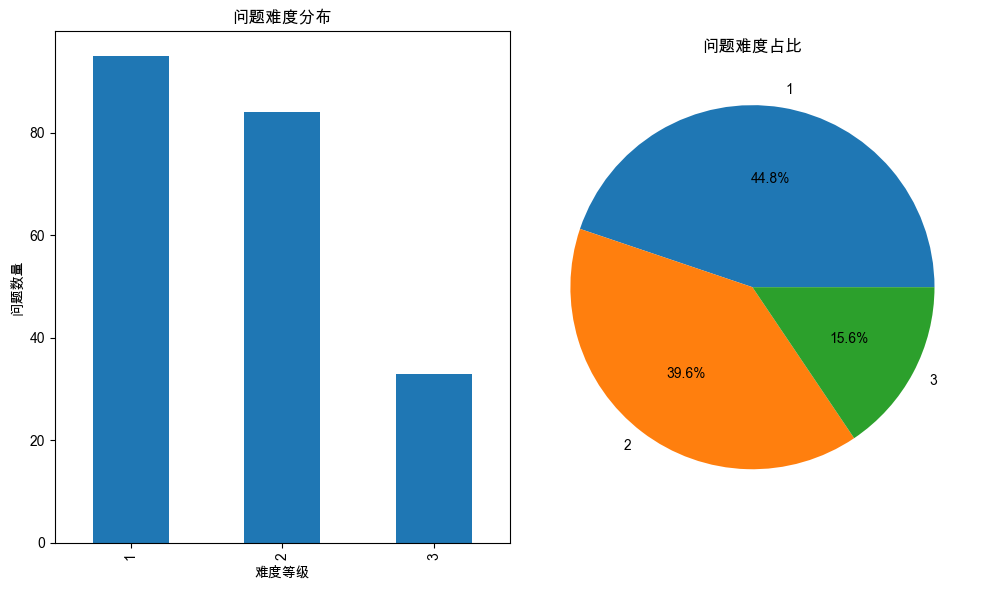


问题示例:
问题ID: 219
问题标题: Q10-20
难度: 3


In [4]:
print("=== 问题数据分析 ===")
print(f"总问题数: {len(questions_df)}")
print(f"\n问题难度分布:")
print(questions_df['difficulty'].value_counts().sort_index())

# 可视化难度分布
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
questions_df['difficulty'].value_counts().sort_index().plot(kind='bar')
plt.title('问题难度分布')
plt.xlabel('难度等级')
plt.ylabel('问题数量')

plt.subplot(1, 2, 2)
questions_df['difficulty'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.title('问题难度占比')
plt.ylabel('')

plt.tight_layout()
plt.show()

# 显示问题示例
print("\n问题示例:")
sample_question = questions_df.iloc[0]
print(f"问题ID: {sample_question['id']}")
print(f"问题标题: {sample_question['question_title']}")
print(f"难度: {sample_question['difficulty']}")


### 3.2 学生练习行为数据 (Transaction)


=== 学生练习行为数据分析 ===
总练习记录数: 161953
涉及学生数: 1264
涉及问题数: 212

答题正确率: 76.45%
使用提示比例: 2.60%


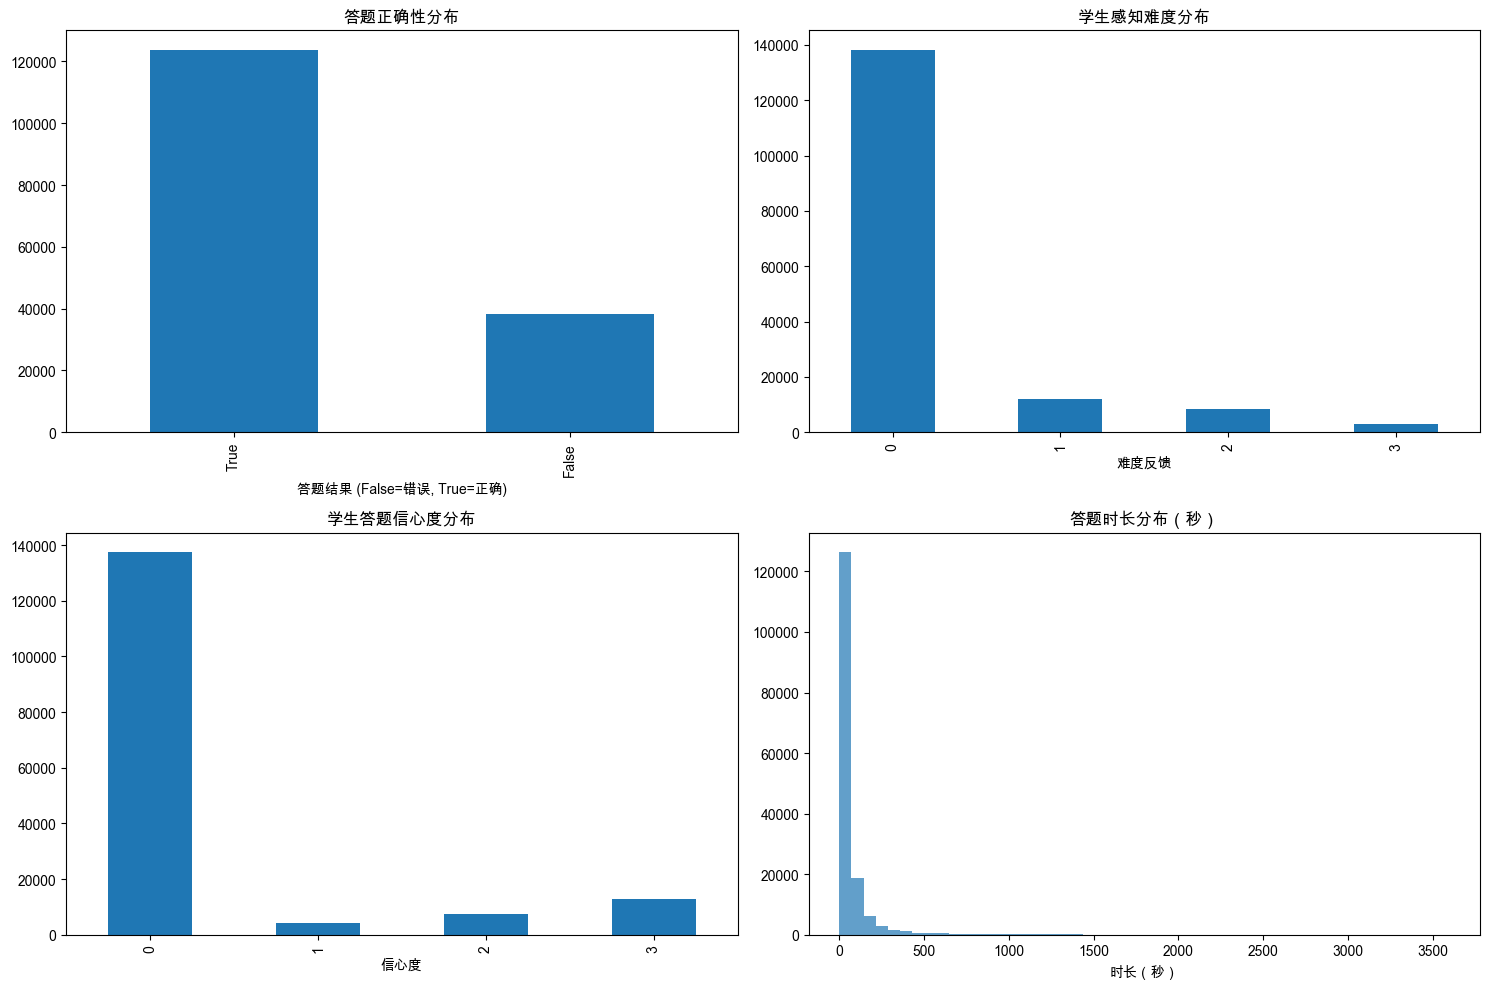


答题时长统计（秒）:
count    161064.000000
mean         77.881110
std         210.081513
min          -0.001000
25%          15.191000
50%          28.805500
75%          62.139000
max        3598.931000
Name: duration, dtype: float64


In [5]:
print("=== 学生练习行为数据分析 ===")
print(f"总练习记录数: {len(transactions_df)}")
print(f"涉及学生数: {transactions_df['student_id'].nunique()}")
print(f"涉及问题数: {transactions_df['question_id'].nunique()}")

# 转换时间列
transactions_df['start_time'] = pd.to_datetime(transactions_df['start_time'], utc=True, errors='coerce')
transactions_df['end_time'] = pd.to_datetime(transactions_df['end_time'], utc=True, errors='coerce')
transactions_df['duration'] = (transactions_df['end_time'] - transactions_df['start_time']).dt.total_seconds()

print(f"\n答题正确率: {transactions_df['answer_state'].mean():.2%}")
print(f"使用提示比例: {transactions_df['hint_used'].mean():.2%}")

# 可视化答题情况
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 答题正确性分布
transactions_df['answer_state'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('答题正确性分布')
axes[0,0].set_xlabel('答题结果 (False=错误, True=正确)')

# 难度反馈分布
transactions_df['difficulty_feedback'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('学生感知难度分布')
axes[0,1].set_xlabel('难度反馈')

# 信心度分布
transactions_df['trust_feedback'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('学生答题信心度分布')
axes[1,0].set_xlabel('信心度')

# 答题时长分布（过滤异常值）
duration_filtered = transactions_df[transactions_df['duration'] <= 3600]['duration']  # 小于1小时
axes[1,1].hist(duration_filtered.dropna(), bins=50, alpha=0.7)
axes[1,1].set_title('答题时长分布（秒）')
axes[1,1].set_xlabel('时长（秒）')

plt.tight_layout()
plt.show()

print(f"\n答题时长统计（秒）:")
print(duration_filtered.describe())


## 4. 数据关联关系分析


In [6]:
transactions_df.head()

,id,selection_change,start_time,end_time,difficulty_feedback,trust_feedback,answer_state,answer_text,student_id,hint_used,question_id,answer_choice_id,is_hidden,duration
0,35,0,2019-08-08 00:12:08.722000+00:00,2019-08-08 00:12:08.721000+00:00,1,3,True,NaN,5,False,36,121,False,-0.001
1,38,0,2019-08-10 15:28:12.116000+00:00,2019-08-10 15:28:12.116000+00:00,3,1,False,NaN,5,False,37,125,False,0.000
2,39,0,2019-08-10 15:33:03.479000+00:00,2019-08-10 15:33:03.478000+00:00,1,1,True,NaN,5,False,2,7,False,-0.001
3,40,0,2019-08-10 15:40:25.411000+00:00,2019-08-10 15:40:25.411000+00:00,0,2,True,NaN,5,False,5,18,False,0.000
4,41,0,2019-08-10 15:51:39.062000+00:00,2019-08-10 15:51:39.062000+00:00,3,2,False,NaN,5,False,3,11,False,0.000


=== 问题选项数量分布分析 ===

每个问题的选项数量统计:
count    212.000000
mean       3.566038
std        0.791170
min        2.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: choice_text, dtype: float64


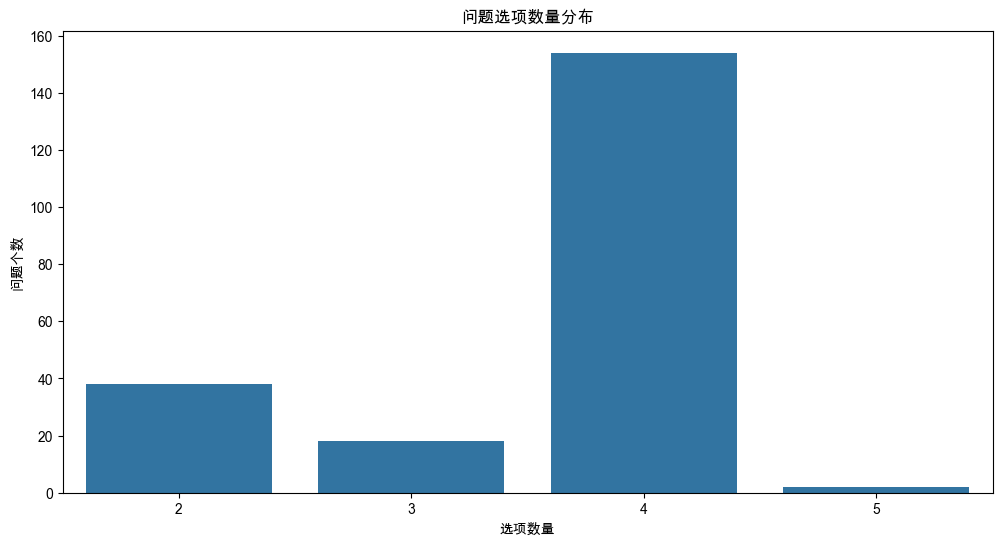

In [7]:
print("=== 问题选项数量分布分析 ===")

# 合并问题和选项数据
question_with_choices_df = pd.merge(questions_df, question_choices_df, left_on='id', right_on='question_id', how='left')

# 按问题ID统计选项数量
choice_counts = question_with_choices_df.groupby('id_x')['choice_text'].count()

print("\n每个问题的选项数量统计:")
print(choice_counts.describe())

# 可视化选项数量分布
plt.figure(figsize=(12, 6))
sns.countplot(x=choice_counts)
plt.title('问题选项数量分布')
plt.xlabel('选项数量')
plt.ylabel('问题个数')
plt.show()


In [8]:
print("=== 随机抽样问题及其选项 ===")

# 随机抽取5个问题ID
sample_question_ids = questions_df['id'].sample(5).tolist()

for q_id in sample_question_ids:
    print(f"\n--- 问题ID: {q_id} ---")
    
    # 获取问题文本
    question_text = questions_df[questions_df['id'] == q_id]['question_text'].iloc[0]
    print(f"问题内容: {question_text[:100]}...") # 显示前100个字符
    
    # 获取并显示该问题的所有选项
    choices = question_choices_df[question_choices_df['question_id'] == q_id]
    print("选项:")
    for i, choice in enumerate(choices.itertuples(), 1):
        print(f"  选项 {i}: {choice.choice_text} (正确: {choice.is_correct})")



=== 随机抽样问题及其选项 ===

--- 问题ID: 14 ---
问题内容: If A and B are two sets, and A × B consists of 6 elements: If three elements of A × B are (2, 5) (3,...
选项:
  选项 1: {(2, 2), (7, 7), (5, 5), (3, 3), (4, 4),(4,7)} (正确: False)
  选项 2: {(2, 5), (2, 7), (3, 5), (3, 7), (3,4), (4,3)} (正确: False)
  选项 3: {(2, 5), (2, 7), (3, 5), (3, 7), (4,5), (4,7)} (正确: True)
  选项 4: {(2, 5), (3, 7), (5, 5), (4, 7), (2,7), (3,5)} (正确: False)

--- 问题ID: 73 ---
问题内容: What is the query result for the following Select statement? SELECT COUNT(units), MIN(units) FROM St...
选项:
  选项 1: 4, 6 (正确: False)
  选项 2: 3, 4 (正确: False)
  选项 3: 6, 4 (正确: True)
  选项 4: 4, 3 (正确: False)

--- 问题ID: 104 ---
问题内容: Consider a database that stores names, addresses and unique IDs of employees in a fitness centre. Th...
选项:
  选项 1: Partial (正确: True)
  选项 2: Total (正确: False)

--- 问题ID: 217 ---
问题内容: Consider the following two transactions and , which transfer money between different accounts. If th...
选项:
  选项 1: None of 1, 2 and 3 (正确: 

=== 问题正确答案数量分析 ===
分析完成：数据集中所有问题都只有一个正确答案。

正确答案数量的整体分布情况:
is_correct
1    212
Name: count, dtype: int64


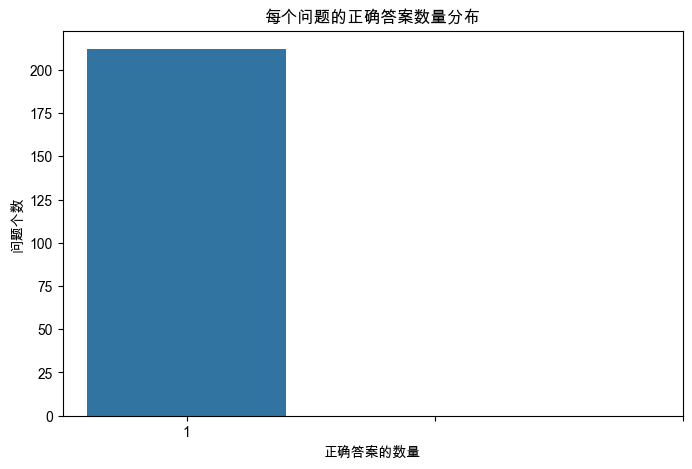

In [9]:
print("=== 问题正确答案数量分析 ===")

# 筛选出所有正确答案
correct_answers_df = question_choices_df[question_choices_df['is_correct'] == True]

# 按问题ID统计正确答案的数量
correct_answers_per_question = correct_answers_df.groupby('question_id')['is_correct'].count()

# 检查是否有问题的正确答案数量大于1
multiple_correct_answers = correct_answers_per_question[correct_answers_per_question > 1]

if multiple_correct_answers.empty:
    print("分析完成：数据集中所有问题都只有一个正确答案。")
else:
    print("分析发现存在有多个正确答案的问题！")
    print("\n具有多个正确答案的问题ID及其正确答案数量:")
    print(multiple_correct_answers)

print("\n正确答案数量的整体分布情况:")
print(correct_answers_per_question.value_counts())

# 可视化正确答案数量的分布
plt.figure(figsize=(8, 5))
sns.countplot(x=correct_answers_per_question)
plt.title('每个问题的正确答案数量分布')
plt.xlabel('正确答案的数量')
plt.ylabel('问题个数')
plt.xticks(range(0, correct_answers_per_question.max() + 2)) # 调整x轴刻度以包含所有可能的值
plt.show()



=== 每个问题关联的知识点数量分布分析 ===

每个问题关联知识点数量的描述性统计:
count    212.000000
mean       1.896226
std        0.802003
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: knowledgecomponent_id, dtype: float64


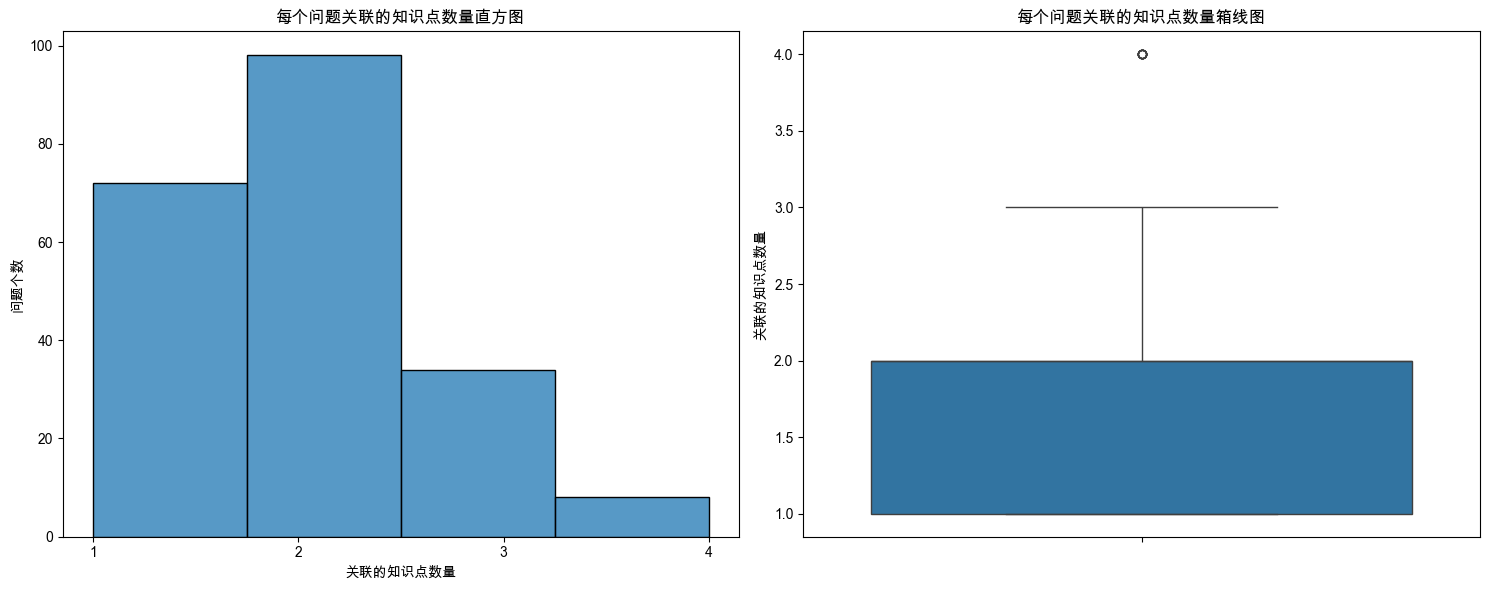

In [10]:
print("=== 每个问题关联的知识点数量分布分析 ===")

# 按问题ID统计关联的知识点数量
kcs_per_question = question_kc_relationships_df.groupby('question_id')['knowledgecomponent_id'].count()

print("\n每个问题关联知识点数量的描述性统计:")
print(kcs_per_question.describe())

# 可视化分布
plt.figure(figsize=(15, 6))

# 直方图
plt.subplot(1, 2, 1)
sns.histplot(kcs_per_question, bins=kcs_per_question.max(), kde=False)
plt.title('每个问题关联的知识点数量直方图')
plt.xlabel('关联的知识点数量')
plt.ylabel('问题个数')
plt.xticks(range(1, kcs_per_question.max() + 1))


# 箱线图
plt.subplot(1, 2, 2)
sns.boxplot(y=kcs_per_question)
plt.title('每个问题关联的知识点数量箱线图')
plt.ylabel('关联的知识点数量')

plt.tight_layout()
plt.show()


=== 知识组件关系图可视化 (有向图) ===


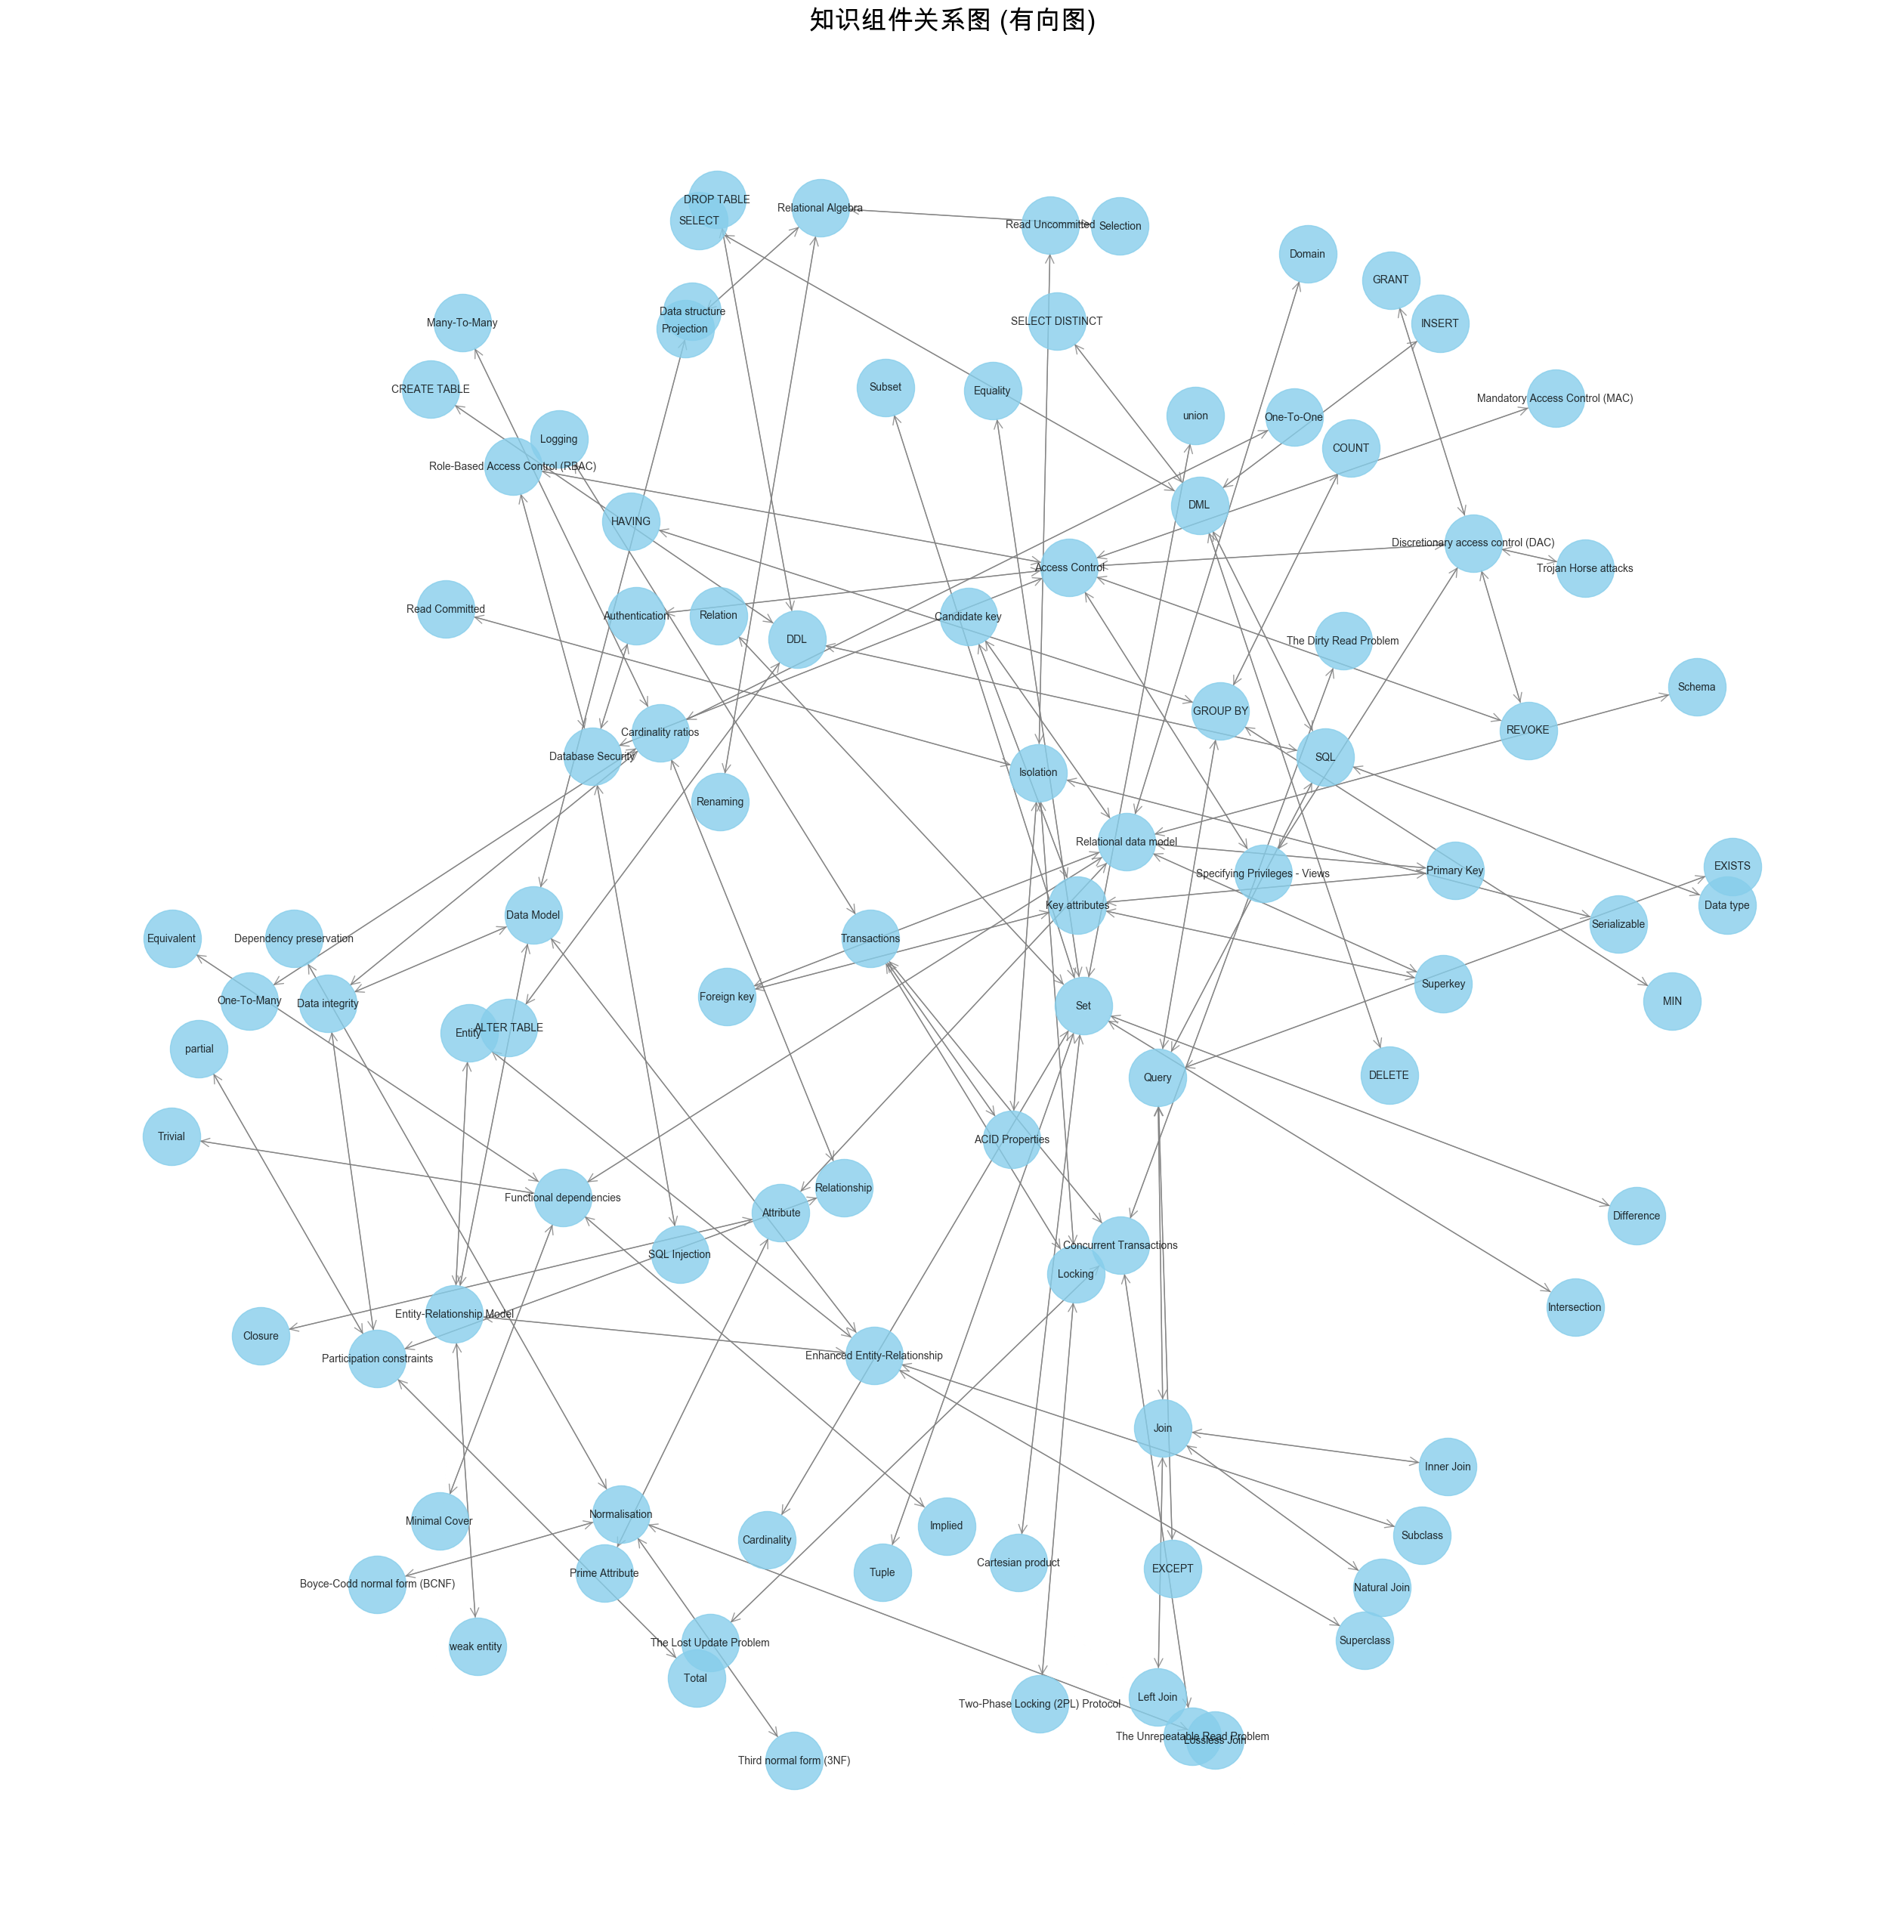


图信息:
节点数量 (知识点): 98
边的数量 (关系): 202


In [11]:
import networkx as nx

print("=== 知识组件关系图可视化 (有向图) ===")

# 创建有向图
G_directed = nx.DiGraph()
edges = kc_relationships_df[['from_knowledgecomponent_id', 'to_knowledgecomponent_id']].values
G_directed.add_edges_from(edges)

# 获取节点标签 (KC ID -> KC Name)
labels = pd.Series(kcs_df.name.values, index=kcs_df.id).to_dict()

# 为图中存在的节点生成标签字典
graph_labels = {node: labels.get(node, str(node)) for node in G_directed.nodes()}

# 绘制图形
plt.figure(figsize=(25, 25))
pos = nx.spring_layout(G_directed, k=0.6, iterations=50) 
nx.draw(
    G_directed, 
    pos, 
    labels=graph_labels, 
    with_labels=True, 
    node_color='skyblue', 
    node_size=3000, 
    edge_color='gray', 
    font_size=10, 
    font_weight='bold', 
    alpha=0.8,
    arrows=True,  # 添加箭头
    arrowstyle='->',
    arrowsize=20
)
plt.title('知识组件关系图 (有向图)', size=25)
plt.show()

print(f"\n图信息:")
print(f"节点数量 (知识点): {G_directed.number_of_nodes()}")
print(f"边的数量 (关系): {G_directed.number_of_edges()}")



In [12]:
print("=== 知识点关系及其描述示例 ===")

# 1. 合并以获取 "from" 知识点的名称和描述
from_merged_df = pd.merge(
    kc_relationships_df,
    kcs_df[['id', 'name', 'description']],
    left_on='from_knowledgecomponent_id',
    right_on='id',
    how='left'
).rename(columns={'name': 'from_kc_name', 'description': 'from_kc_description'})

# 2. 再次合并以获取 "to" 知识点的名称和描述
final_merged_df = pd.merge(
    from_merged_df,
    kcs_df[['id', 'name', 'description']],
    left_on='to_knowledgecomponent_id',
    right_on='id',
    how='left'
).rename(columns={'name': 'to_kc_name', 'description': 'to_kc_description'})

# 3. 选择并展示几个示例
# 为了更好的可读性，我们循环打印出前5个关系
for index, row in final_merged_df.head(5).iterrows():
    print(f"\n----- 关系示例 {index + 1} -----")
    print(f"来源 (From): {row['from_kc_name']}")
    print(f"  - 描述: {row['from_kc_description']}")
    print(f"指向 (To):   {row['to_kc_name']}")
    print(f"  - 描述: {row['to_kc_description']}")
    print("-" * 60)



=== 知识点关系及其描述示例 ===

----- 关系示例 1 -----
来源 (From): Subclass
  - 描述: A subclass is a class derived from the superclass. It inherits the properties of the superclass and also contains attributes of its own.
指向 (To):   Enhanced Entity-Relationship
  - 描述: Enhanced entity-relationship diagrams are advanced database diagrams very similar to regular ER diagrams which represent requirements and complexities of complex databases.  It is a diagrammatic technique for displaying the Sub Class and Super Class; Specialization and Generalization; Union or Category; Aggregation. 
------------------------------------------------------------

----- 关系示例 2 -----
来源 (From): Enhanced Entity-Relationship
  - 描述: Enhanced entity-relationship diagrams are advanced database diagrams very similar to regular ER diagrams which represent requirements and complexities of complex databases.  It is a diagrammatic technique for displaying the Sub Class and Super Class; Specialization and Generalization; Union or Cate

In [13]:
print("=== 验证知识点关系是否为双向 ===")

# 创建一个集合，用于快速查找存在的边
# 将(from, to)元组存入set中
existing_edges = set(zip(kc_relationships_df['from_knowledgecomponent_id'], kc_relationships_df['to_knowledgecomponent_id']))

unidirectional_edges = []
bidirectional_pairs = set()

# 遍历所有边
for from_kc, to_kc in existing_edges:
    # 创建一个标准化的pair，用于防止重复计数，例如(A,B)和(B,A)只记录一次
    edge_pair = tuple(sorted((from_kc, to_kc)))
    
    # 检查反向边是否存在
    if (to_kc, from_kc) in existing_edges:
        if edge_pair not in bidirectional_pairs:
            bidirectional_pairs.add(edge_pair)
    else:
        unidirectional_edges.append((from_kc, to_kc))

total_relationships = len(existing_edges)
num_bidirectional_relationships = len(bidirectional_pairs) * 2
num_unidirectional_relationships = len(unidirectional_edges)

print(f"总关系数量: {total_relationships}")
print(f"检测到的双向关系对数量: {len(bidirectional_pairs)}")
print(f"属于双向关系的总边数: {num_bidirectional_relationships}")
print(f"检测到的单向关系数量: {num_unidirectional_relationships}")

print("\n--- 结论 ---")
if num_unidirectional_relationships == 0 and total_relationships > 0:
    print("您的观察非常准确！数据中所有的知识点关系都是双向的。")
    print("这意味着对于每一个 A -> B 的关系，都存在一个 B -> A 的关系。")
    print("因此，这个知识图谱可以被视为一个无向图。")
else:
    print("数据中存在单向的知识点关系。")
    if unidirectional_edges:
        print("\n找到的单向关系示例 (最多显示5条):")
        for i, edge in enumerate(unidirectional_edges[:5]):
            print(f"  {i+1}. 从 {edge[0]} 到 {edge[1]}")



=== 验证知识点关系是否为双向 ===
总关系数量: 202
检测到的双向关系对数量: 101
属于双向关系的总边数: 202
检测到的单向关系数量: 0

--- 结论 ---
您的观察非常准确！数据中所有的知识点关系都是双向的。
这意味着对于每一个 A -> B 的关系，都存在一个 B -> A 的关系。
因此，这个知识图谱可以被视为一个无向图。


=== 每位学生做题数量分布分析 ===

每位学生做题数量的描述性统计:
count    1264.000000
mean      128.127373
std        84.071617
min         1.000000
25%        50.750000
50%       148.000000
75%       204.000000
max      1171.000000
Name: question_id, dtype: float64


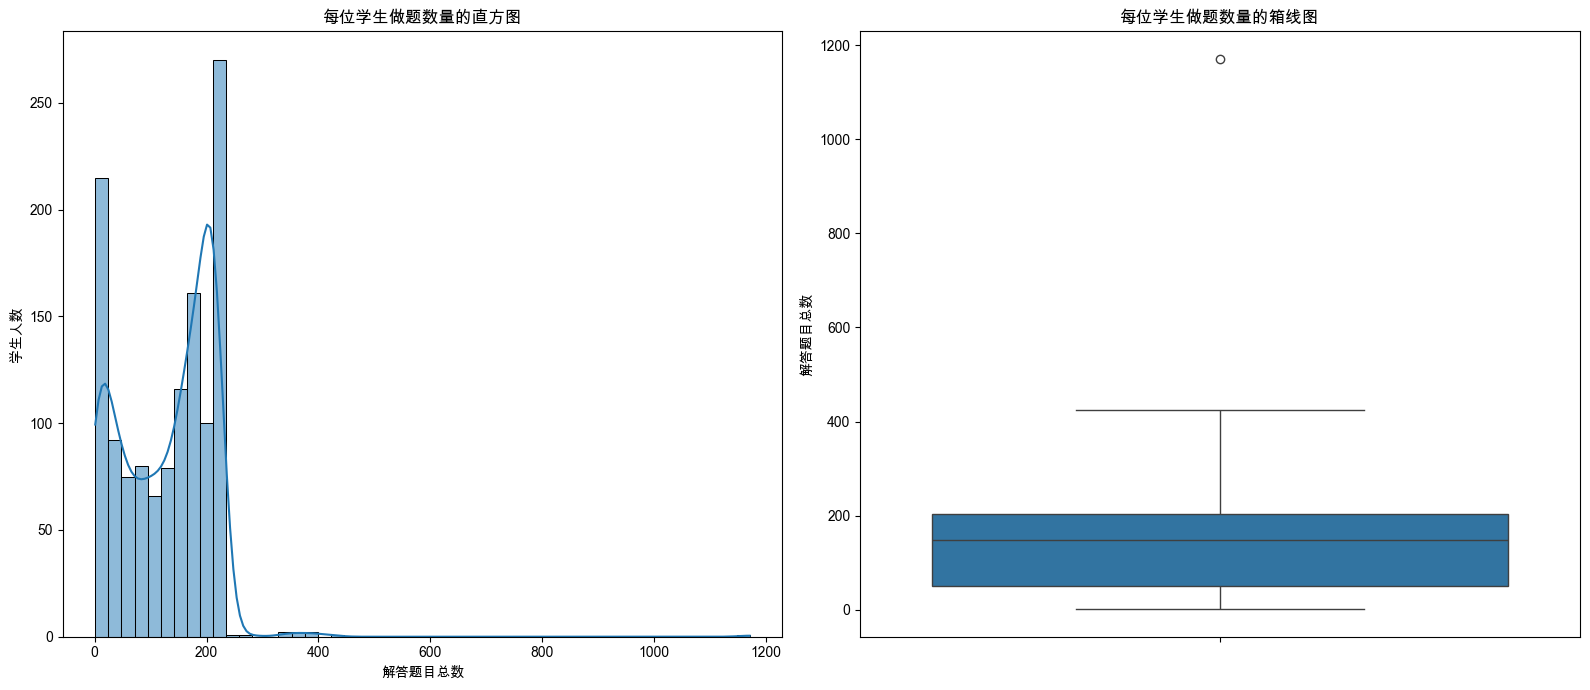

In [15]:
print("=== 每位学生做题数量分布分析 ===")

# 按学生ID统计答题数量 (每个transaction记录是一次答题)
questions_per_student = transactions_df.groupby('student_id')['question_id'].count()

print("\n每位学生做题数量的描述性统计:")
print(questions_per_student.describe())

# 可视化分布
plt.figure(figsize=(16, 7))

# 直方图
plt.subplot(1, 2, 1)
sns.histplot(questions_per_student, bins=50, kde=True)
plt.title('每位学生做题数量的直方图')
plt.xlabel('解答题目总数')
plt.ylabel('学生人数')

# 箱线图
plt.subplot(1, 2, 2)
sns.boxplot(y=questions_per_student)
plt.title('每位学生做题数量的箱线图')
plt.ylabel('解答题目总数')

plt.tight_layout()
plt.show()


=== 学生做题的题目文本长度分布分析 ===
学生做过的题目总数: 212
数据集中的题目总数: 212

--- 题目文本长度的描述性统计 ---
count     212.000000
mean      282.716981
std       457.668266
min        25.000000
25%        73.750000
50%        96.000000
75%       174.500000
max      1837.000000
Name: question_text_length, dtype: float64


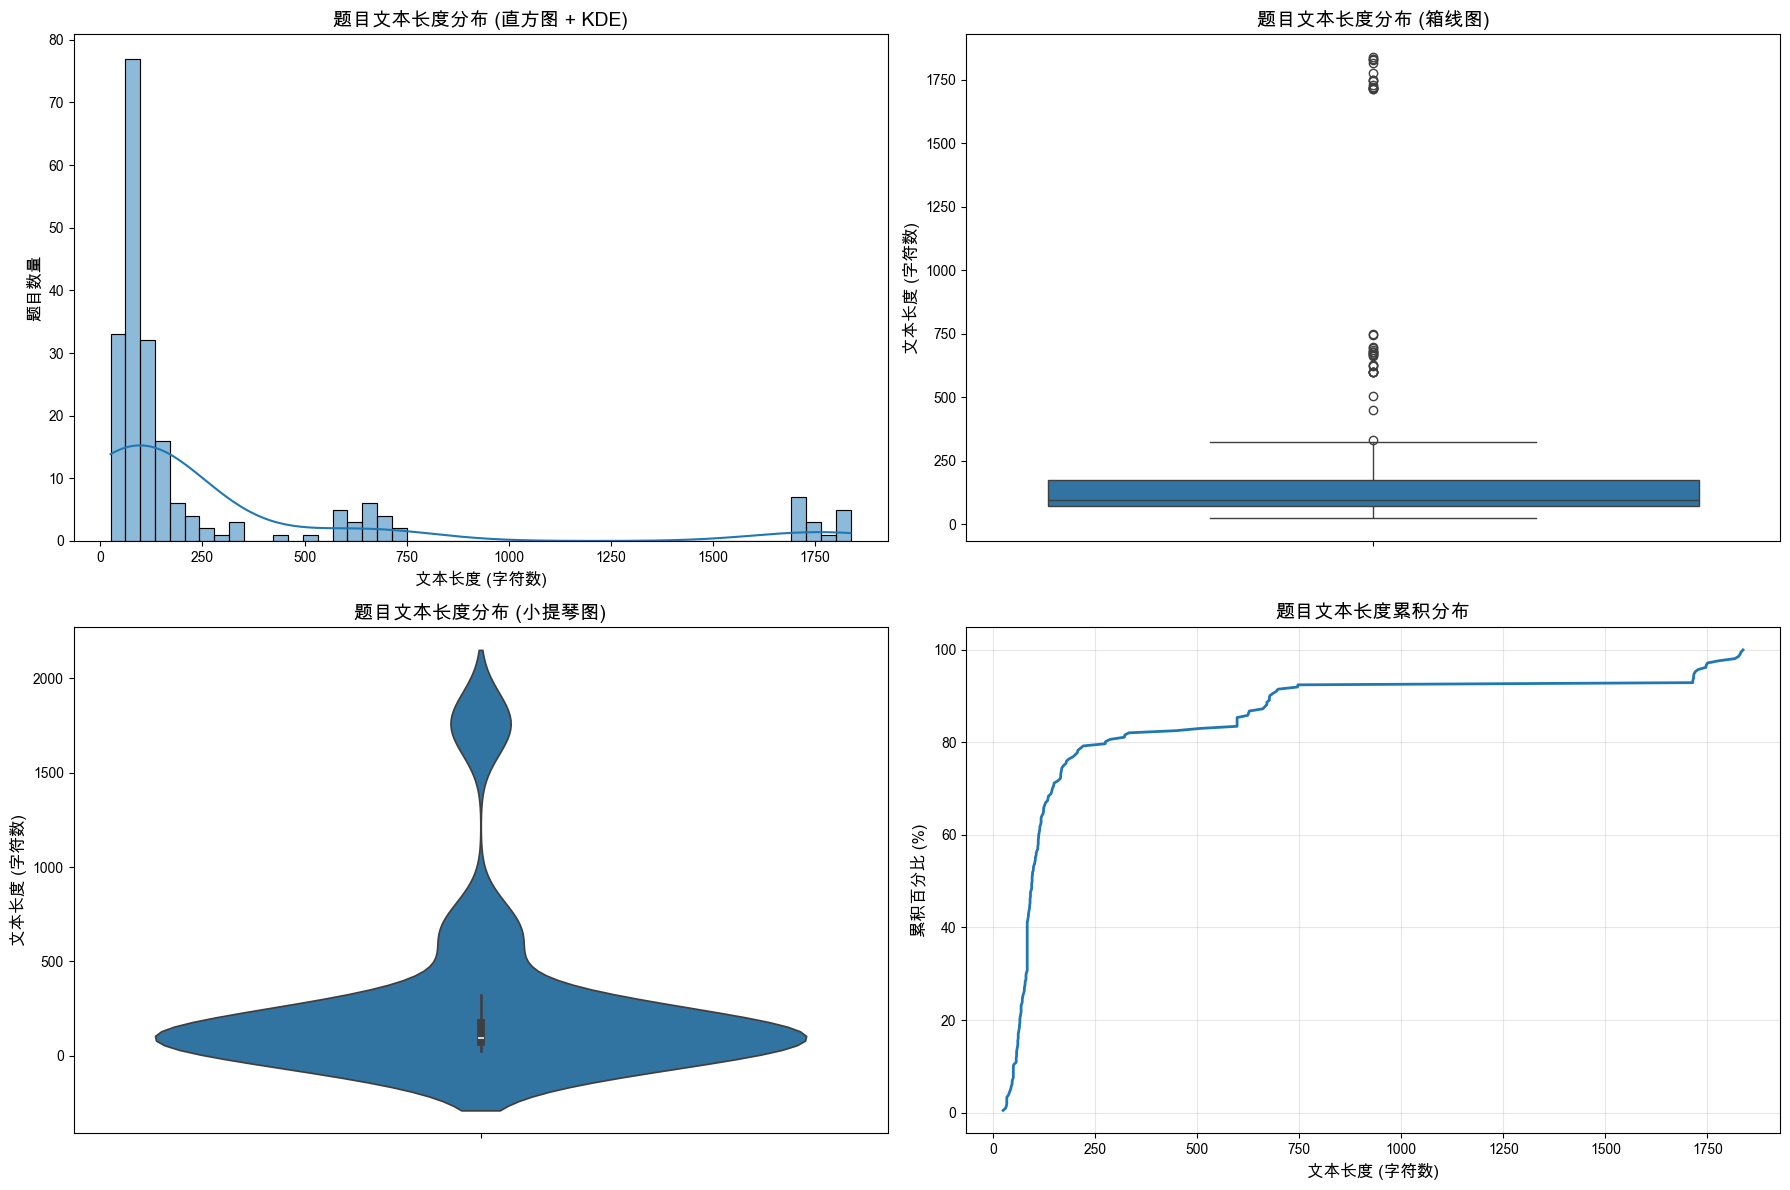


--- 按长度区间统计题目数量 ---
length_range
0-100        113
100-200       50
200-300        8
300-400        3
400-500        1
500-1000      21
1000-2000     16
2000+          0
Name: count, dtype: int64


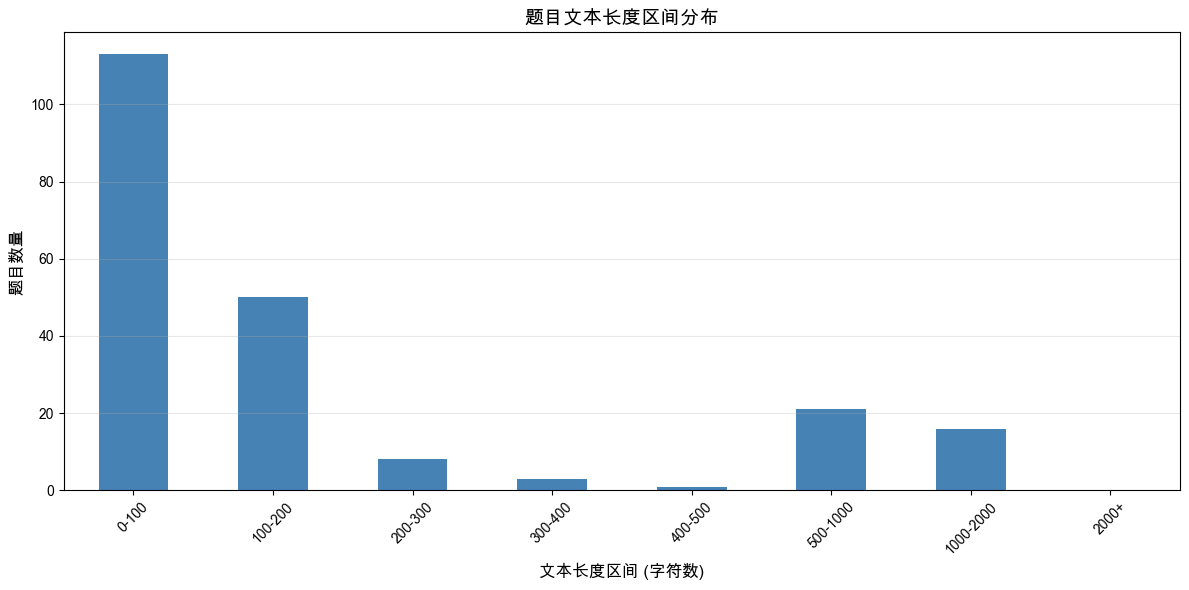


--- 不同长度题目示例 ---

第10百分位 (长度: 322 字符):
题目ID: 219
题目标题: Q10-20
题目内容: Consider two transactions and which are executed in the schedule below: read(D) write(D) read(A) write(A) commit read(B) write(B) abort If the databas...

第25百分位 (长度: 322 字符):
题目ID: 219
题目标题: Q10-20
题目内容: Consider two transactions and which are executed in the schedule below: read(D) write(D) read(A) write(A) commit read(B) write(B) abort If the databas...

第50百分位 (长度: 322 字符):
题目ID: 219
题目标题: Q10-20
题目内容: Consider two transactions and which are executed in the schedule below: read(D) write(D) read(A) write(A) commit read(B) write(B) abort If the databas...

第75百分位 (长度: 322 字符):
题目ID: 219
题目标题: Q10-20
题目内容: Consider two transactions and which are executed in the schedule below: read(D) write(D) read(A) write(A) commit read(B) write(B) abort If the databas...

第90百分位 (长度: 694 字符):
题目ID: 217
题目标题: Q10-18
题目内容: Consider the following two transactions and , which transfer money between different accounts. If the transacti

In [16]:
print("=== 学生做题的题目文本长度分布分析 ===")

# 1. 获取学生实际做过的题目
questions_attempted = transactions_df['question_id'].unique()
questions_attempted_df = questions_df[questions_df['id'].isin(questions_attempted)].copy()

print(f"学生做过的题目总数: {len(questions_attempted_df)}")
print(f"数据集中的题目总数: {len(questions_df)}")

# 2. 计算题目文本长度
questions_attempted_df['question_text_length'] = questions_attempted_df['question_text'].str.len()

print("\n--- 题目文本长度的描述性统计 ---")
print(questions_attempted_df['question_text_length'].describe())

# 3. 可视化分布
plt.figure(figsize=(18, 12))

# 直方图 + KDE
plt.subplot(2, 2, 1)
sns.histplot(questions_attempted_df['question_text_length'], bins=50, kde=True)
plt.title('题目文本长度分布 (直方图 + KDE)', fontsize=14)
plt.xlabel('文本长度 (字符数)', fontsize=12)
plt.ylabel('题目数量', fontsize=12)

# 箱线图
plt.subplot(2, 2, 2)
sns.boxplot(y=questions_attempted_df['question_text_length'])
plt.title('题目文本长度分布 (箱线图)', fontsize=14)
plt.ylabel('文本长度 (字符数)', fontsize=12)

# 小提琴图
plt.subplot(2, 2, 3)
sns.violinplot(y=questions_attempted_df['question_text_length'])
plt.title('题目文本长度分布 (小提琴图)', fontsize=14)
plt.ylabel('文本长度 (字符数)', fontsize=12)

# 累积分布图
plt.subplot(2, 2, 4)
sorted_lengths = np.sort(questions_attempted_df['question_text_length'])
cumulative = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths) * 100
plt.plot(sorted_lengths, cumulative, linewidth=2)
plt.title('题目文本长度累积分布', fontsize=14)
plt.xlabel('文本长度 (字符数)', fontsize=12)
plt.ylabel('累积百分比 (%)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. 按长度区间统计
print("\n--- 按长度区间统计题目数量 ---")
bins = [0, 100, 200, 300, 400, 500, 1000, 2000, float('inf')]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-1000', '1000-2000', '2000+']
questions_attempted_df['length_range'] = pd.cut(questions_attempted_df['question_text_length'], bins=bins, labels=labels)
length_distribution = questions_attempted_df['length_range'].value_counts().sort_index()
print(length_distribution)

# 可视化长度区间分布
plt.figure(figsize=(12, 6))
length_distribution.plot(kind='bar', color='steelblue')
plt.title('题目文本长度区间分布', fontsize=14)
plt.xlabel('文本长度区间 (字符数)', fontsize=12)
plt.ylabel('题目数量', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. 展示几个不同长度的题目示例
print("\n--- 不同长度题目示例 ---")
percentiles = [10, 25, 50, 75, 90]
for p in percentiles:
    length_threshold = questions_attempted_df['question_text_length'].quantile(p / 100)
    sample = questions_attempted_df[questions_attempted_df['question_text_length'] >= length_threshold].iloc[0]
    print(f"\n第{p}百分位 (长度: {int(sample['question_text_length'])} 字符):")
    print(f"题目ID: {sample['id']}")
    print(f"题目标题: {sample['question_title']}")
    print(f"题目内容: {sample['question_text'][:150]}...")  # 显示前150个字符


=== 每个知识点关联的题目数量分布分析 ===

每个知识点关联题目数量的描述性统计:
count    93.000000
mean      4.322581
std       4.969825
min       1.000000
25%       1.000000
50%       2.000000
75%       5.000000
max      28.000000
Name: question_id, dtype: float64

知识点总数: 98
有题目关联的知识点数: 93
没有题目关联的知识点数: 5


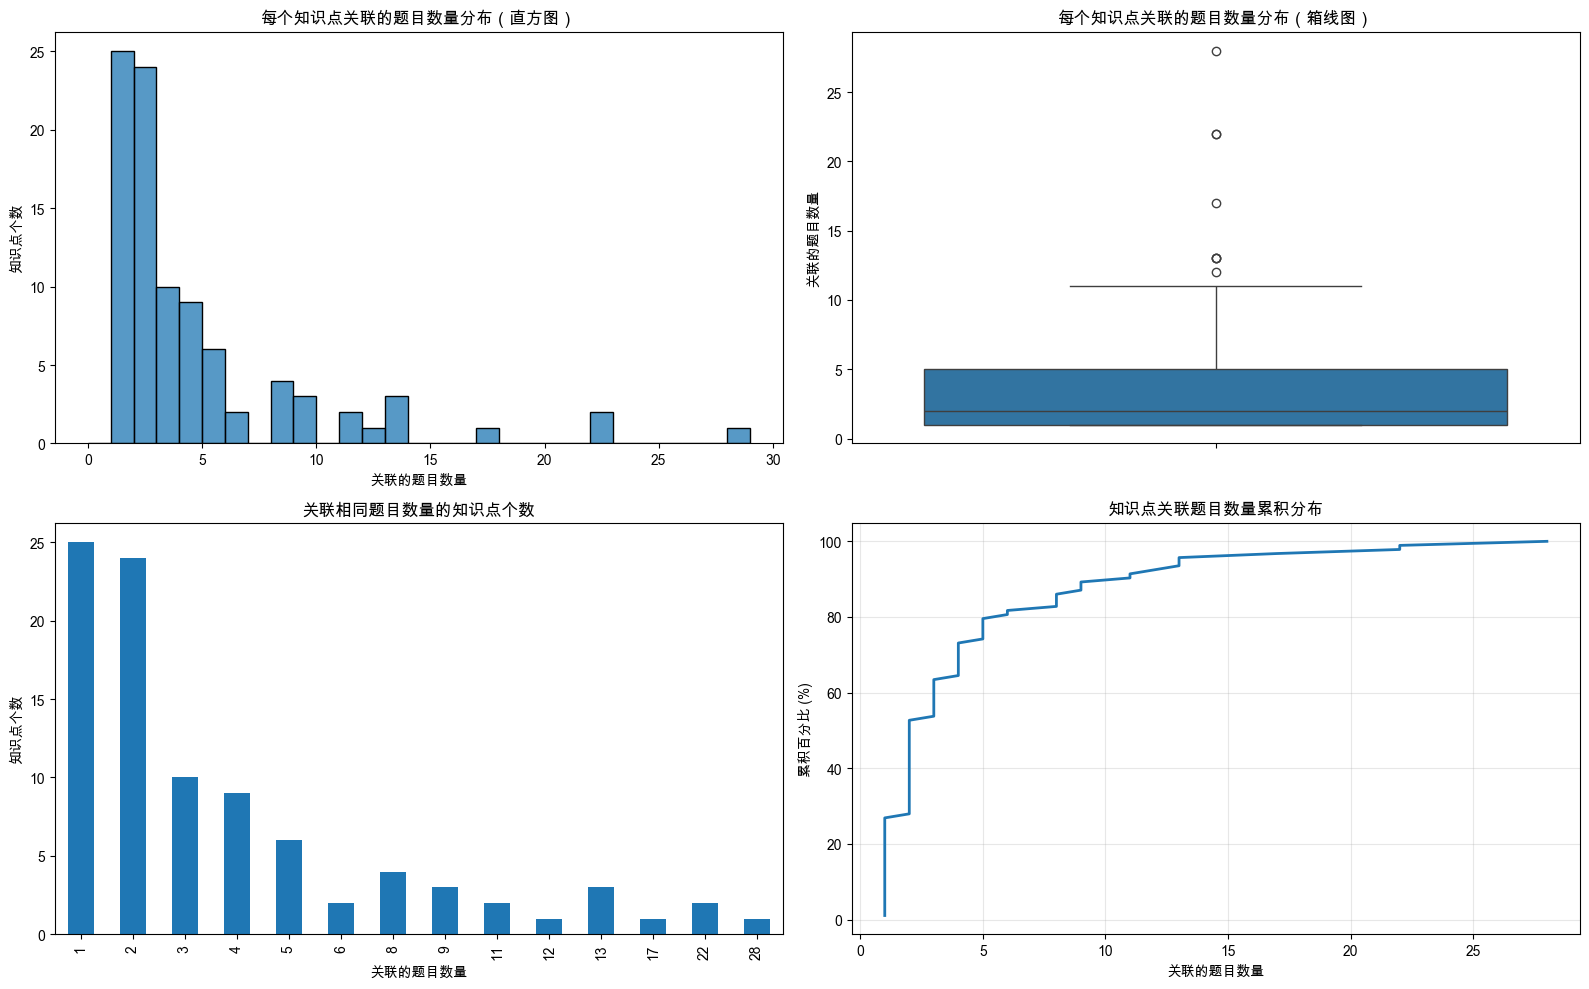


--- 关联题目数量的频次分布 ---
question_id
1     25
2     24
3     10
4      9
5      6
6      2
8      4
9      3
11     2
12     1
13     3
17     1
22     2
28     1
Name: count, dtype: int64
